In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('C:\\Users\\jesse\\Downloads\\Autonopros\\balanced_dataset.csv')

In [87]:
df.describe()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,MachineUtilization,DefectStatus
count,5446.00,5446.00,5446.00,5446.00,5446.00,5446.00,5446.00,5446.00,5446.00,5446.00,5446.00,5446.00,5446.00,5446.00,5446.00,5446.00,5446.00,5446.00
mean,0.46,0.49,0.90,2.52,0.43,0.56,0.41,0.50,0.50,0.49,0.50,4.67,0.50,0.51,0.49,0.50,0.46,0.50
std,0.27,0.27,0.05,1.71,0.27,0.26,0.28,0.27,0.27,0.28,0.27,2.90,0.27,0.28,0.27,0.28,0.27,0.50
min,0.00,0.00,0.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.26,0.85,1.00,0.21,0.38,0.18,0.27,0.28,0.26,0.28,2.00,0.27,0.28,0.27,0.25,0.25,0.00
50%,0.46,0.49,0.89,3.00,0.38,0.59,0.35,0.48,0.50,0.49,0.51,5.00,0.50,0.51,0.49,0.49,0.46,0.50
75%,0.67,0.71,0.94,4.00,0.62,0.78,0.61,0.73,0.73,0.72,0.72,7.00,0.73,0.74,0.73,0.74,0.67,1.00
max,1.00,1.00,1.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00,1.00,1.00,1.00,1.00,1.00,1.00


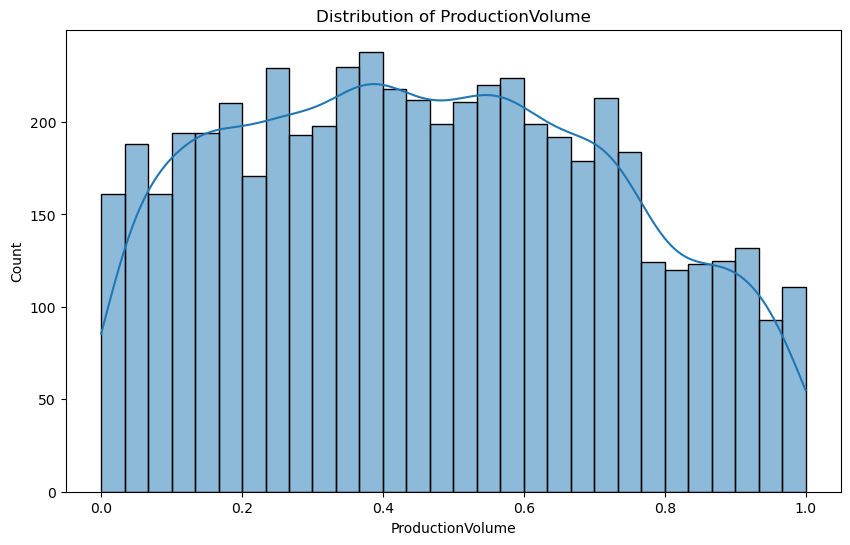

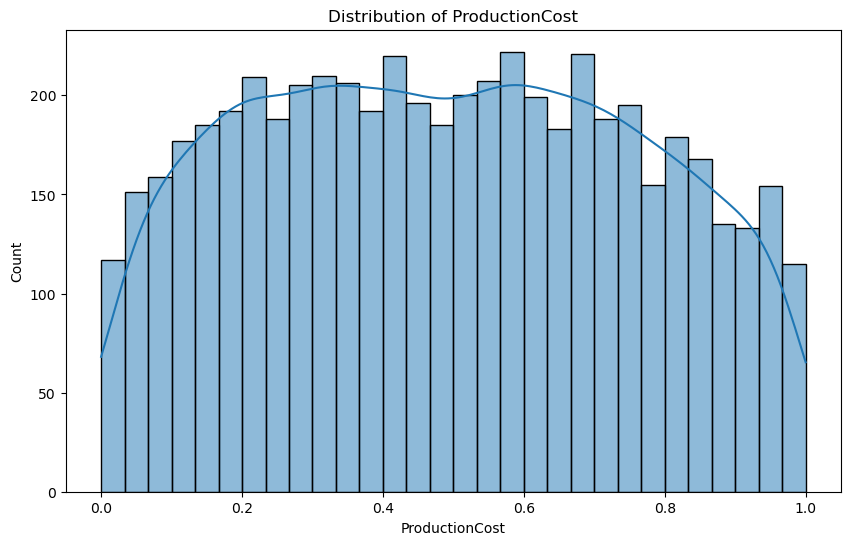

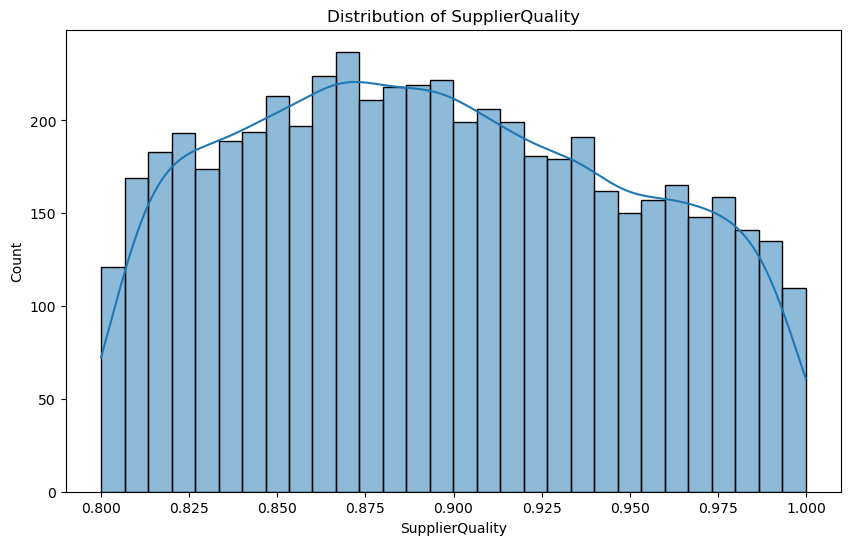

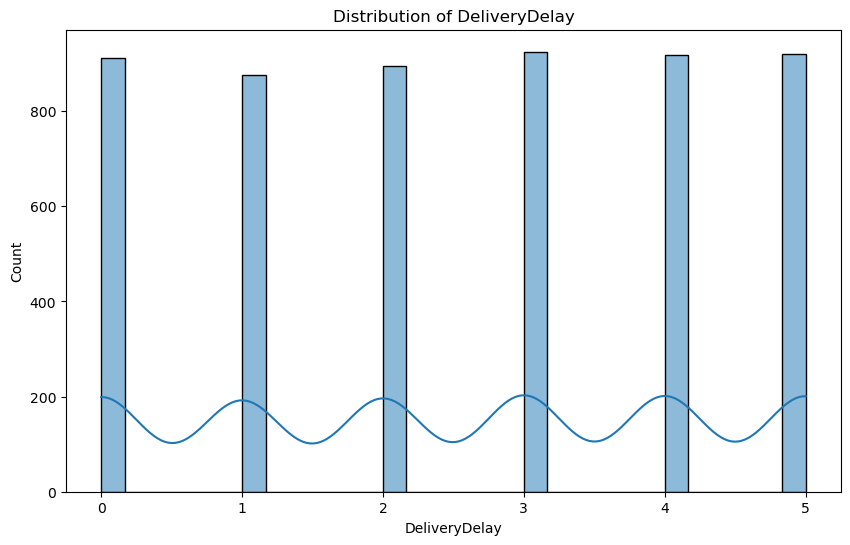

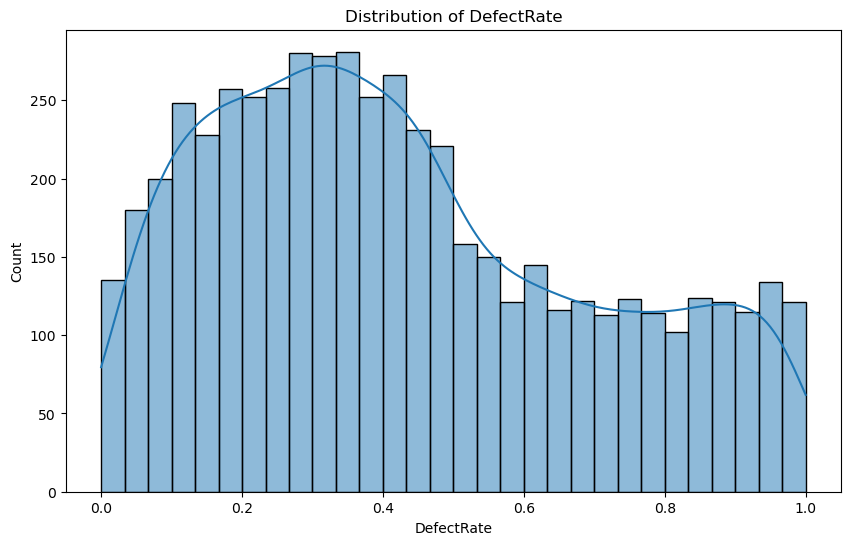

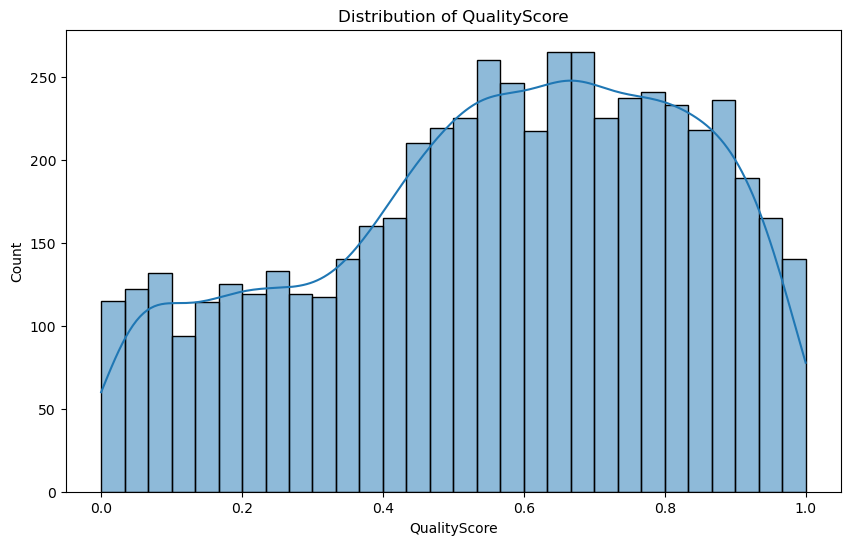

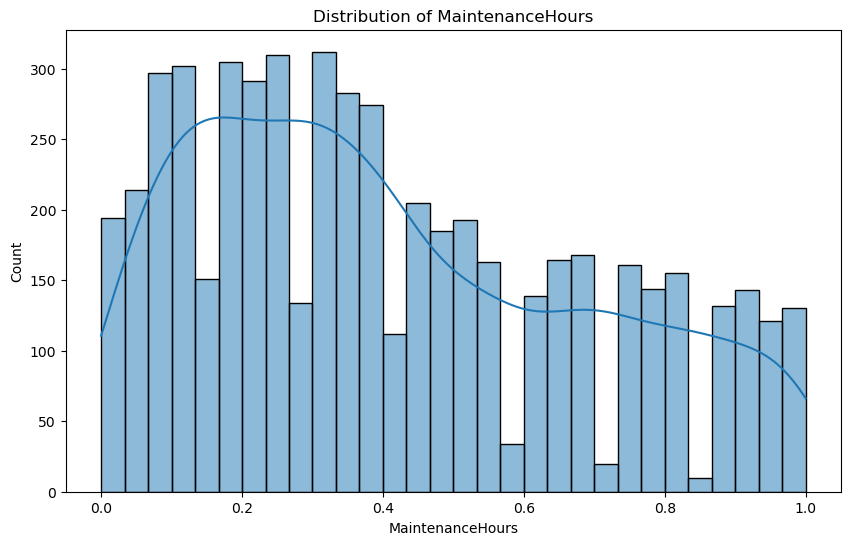

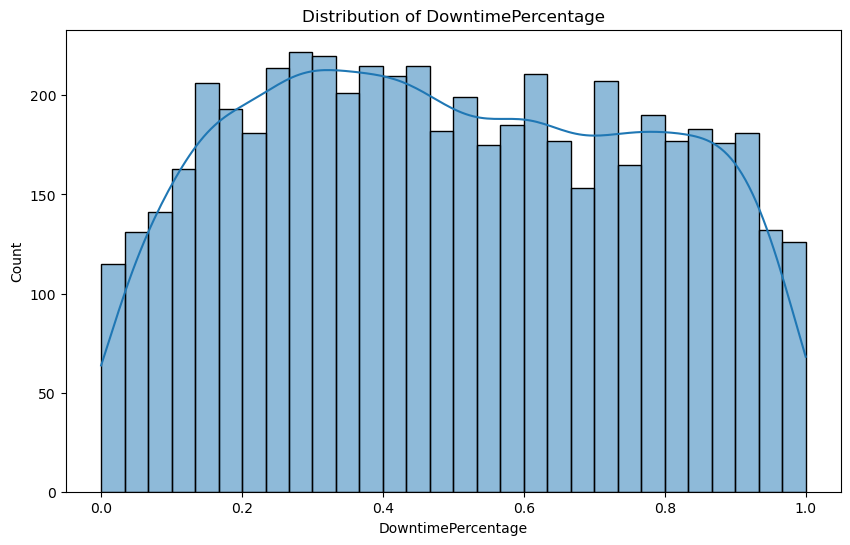

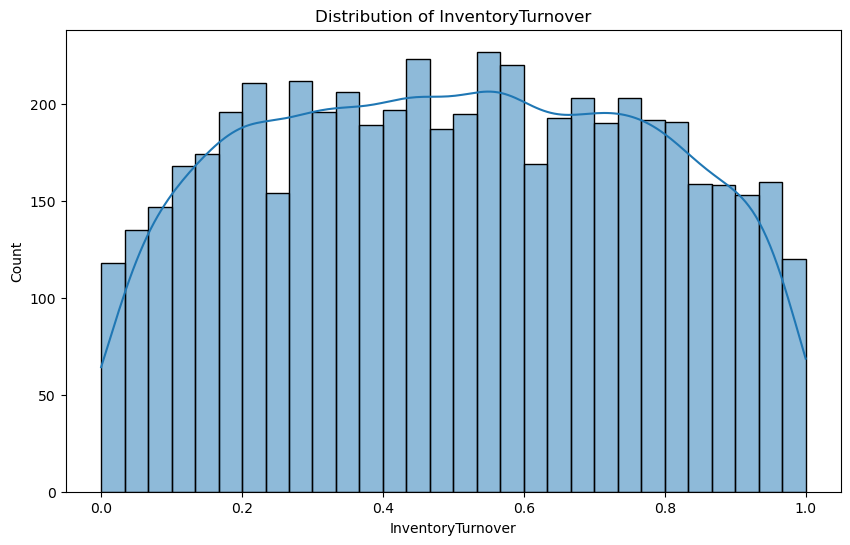

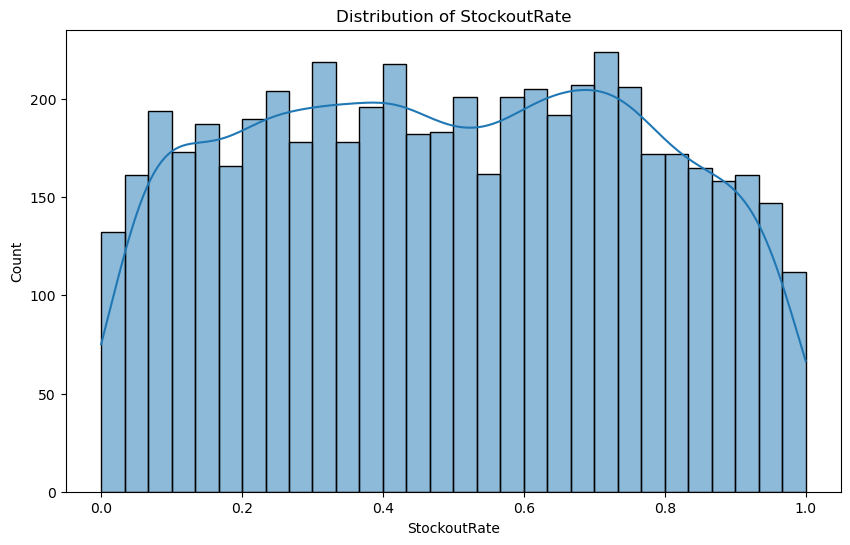

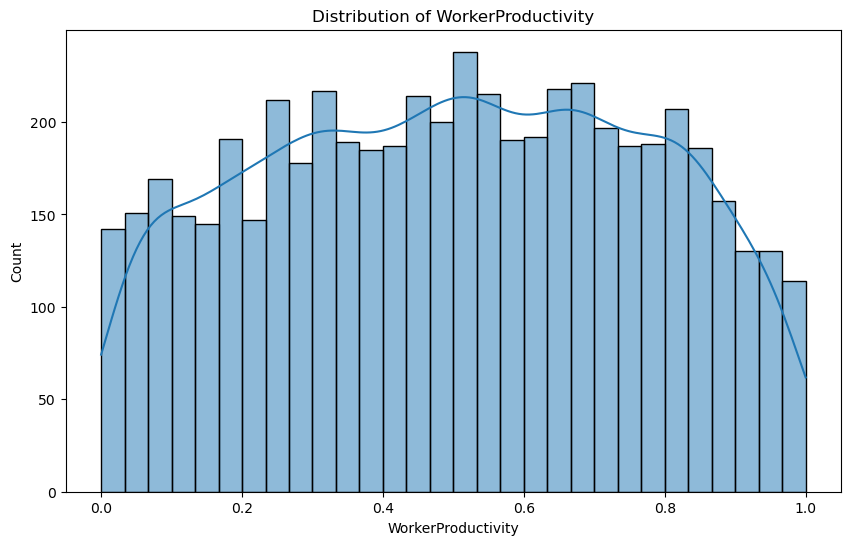

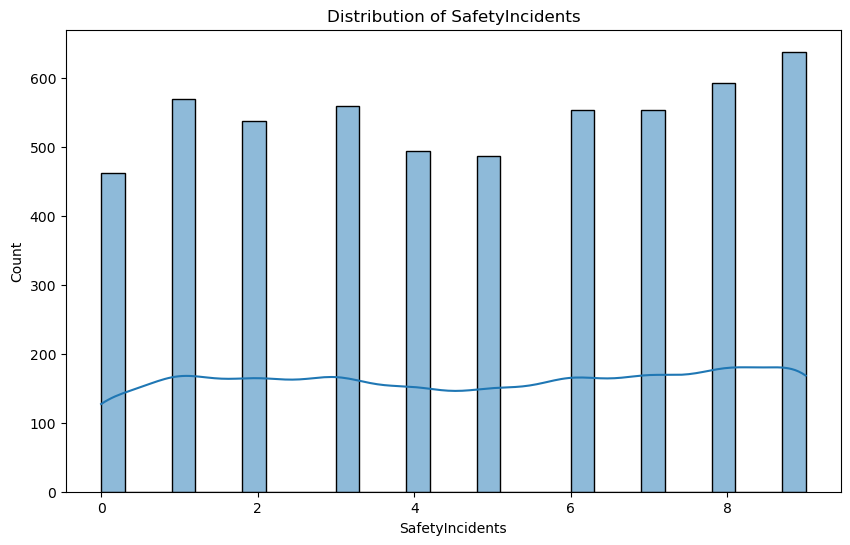

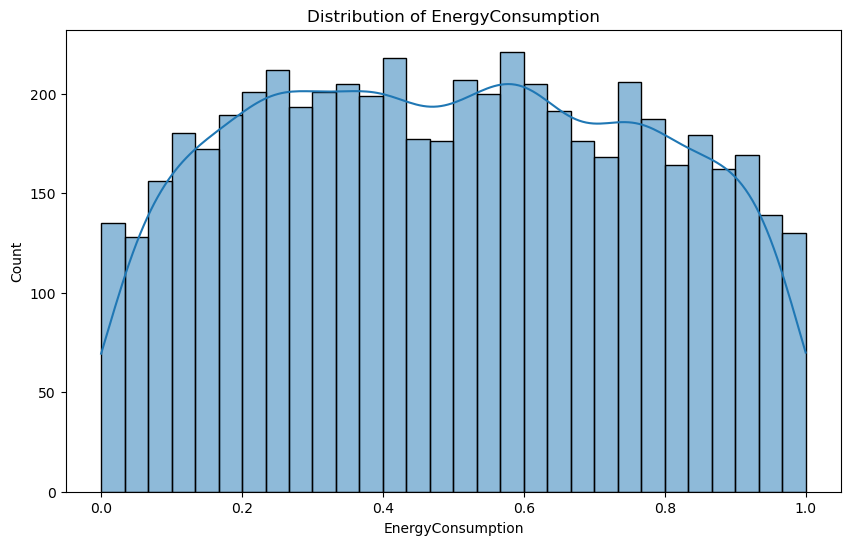

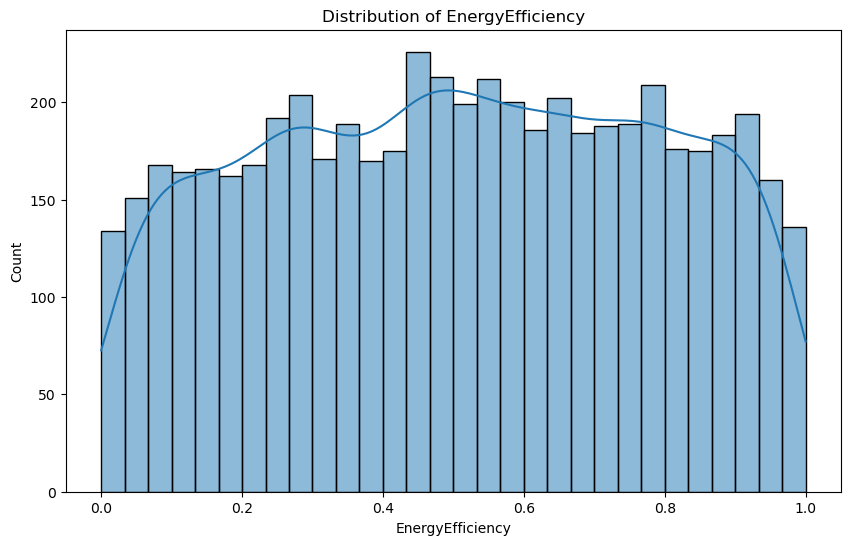

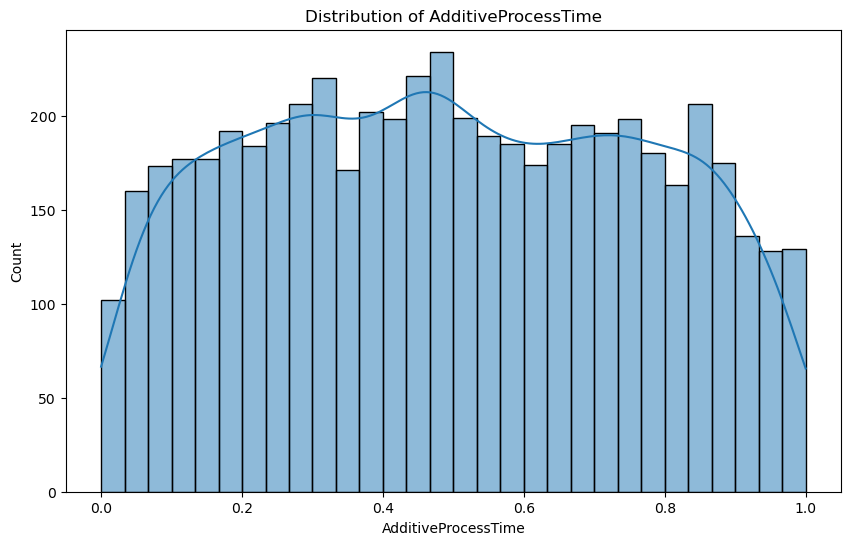

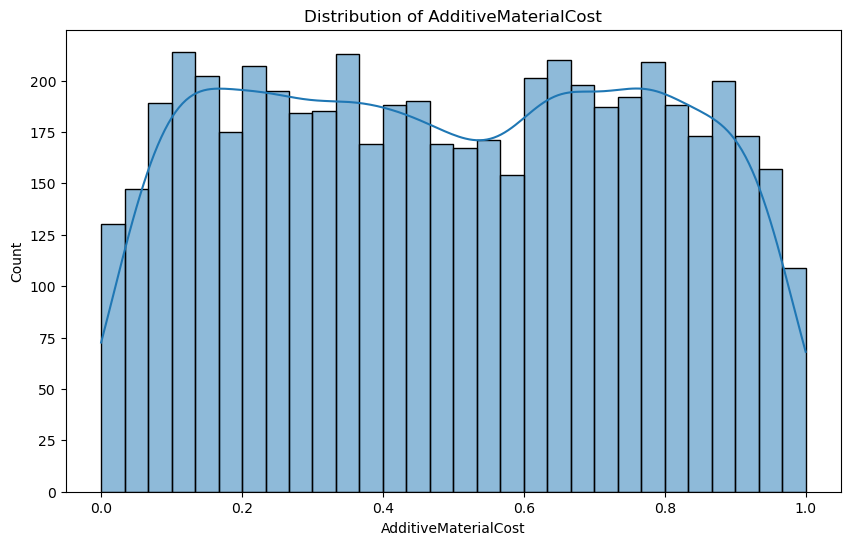

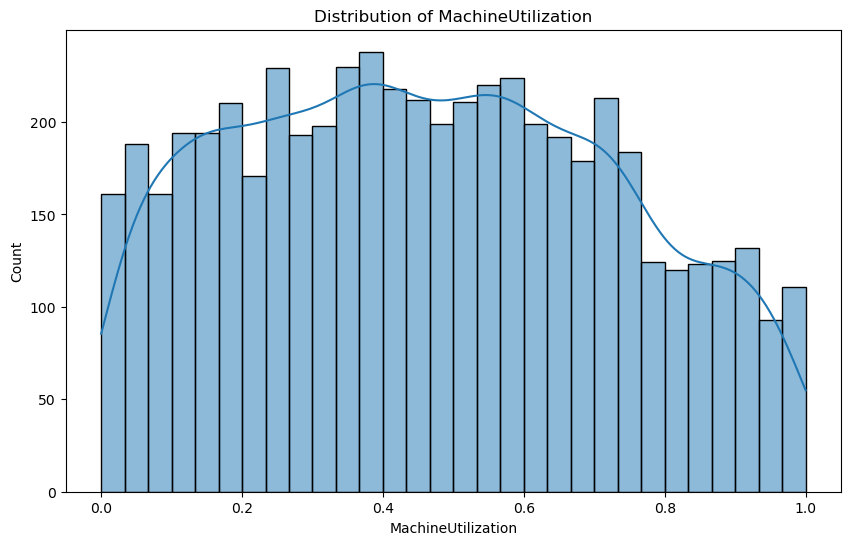

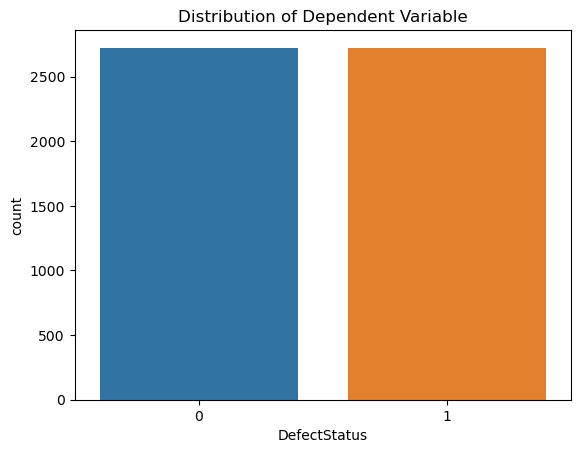

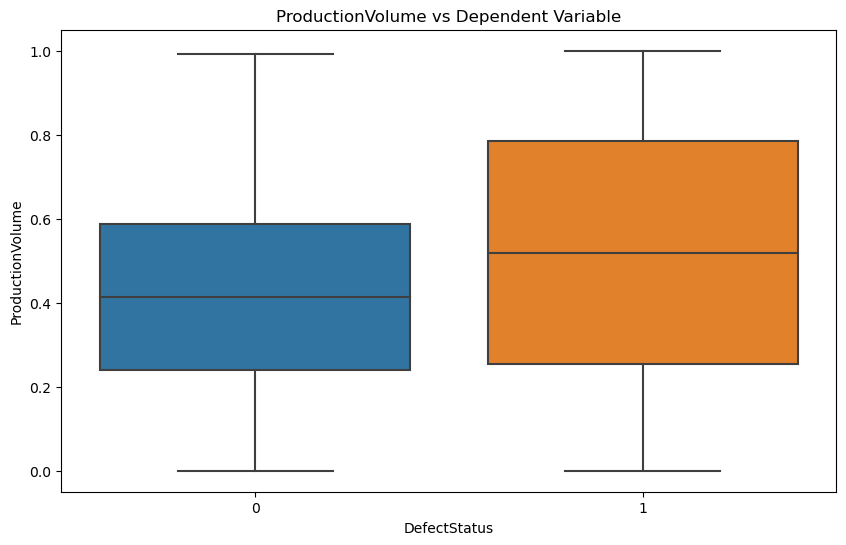

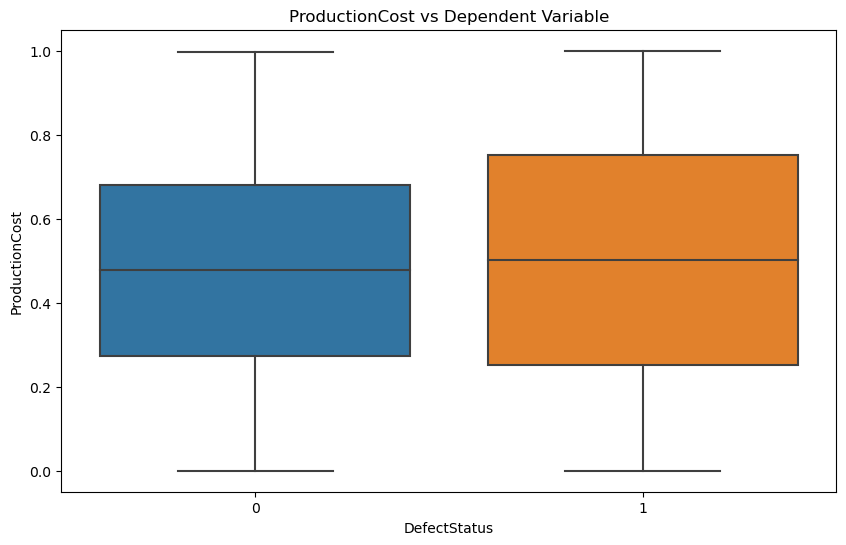

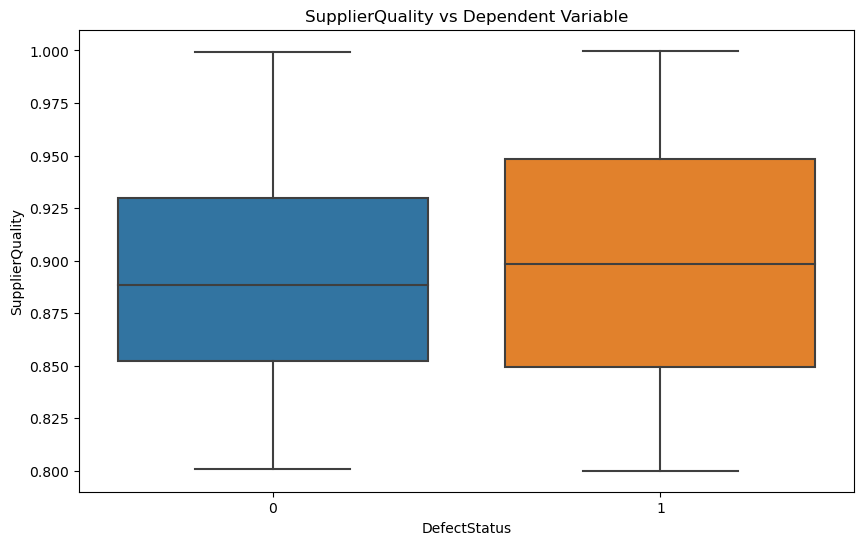

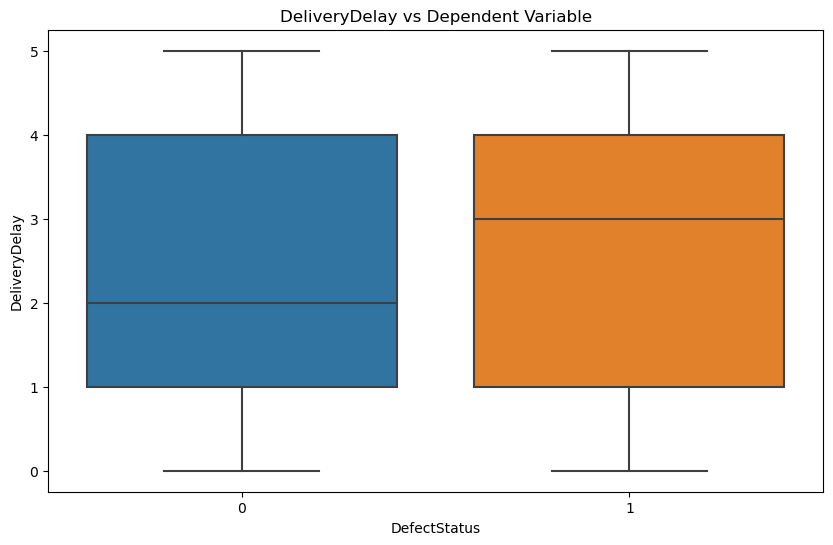

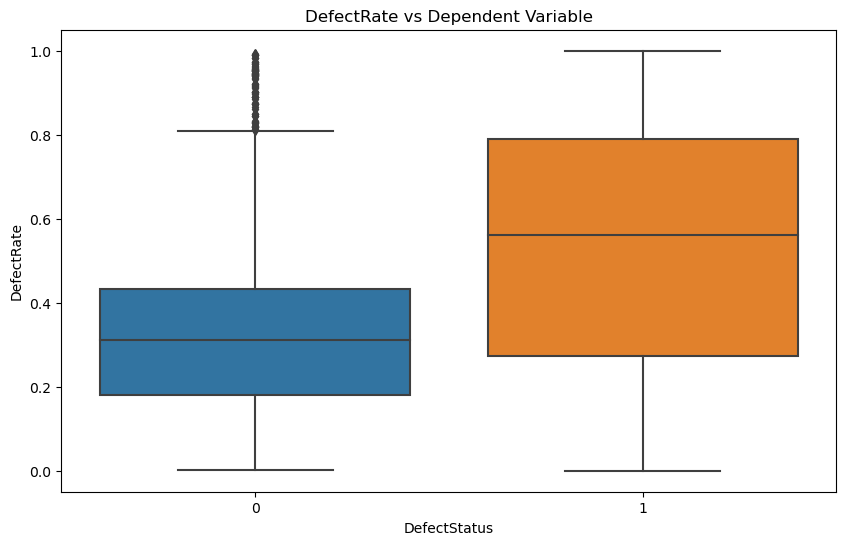

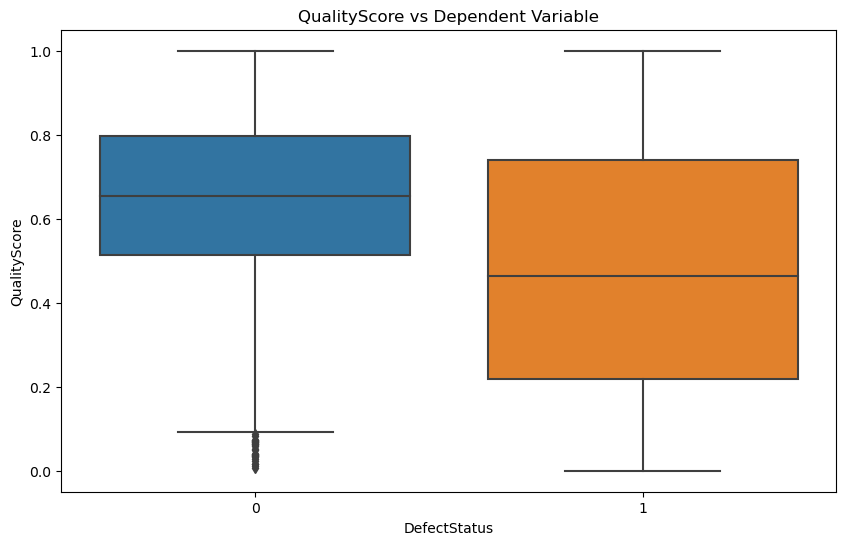

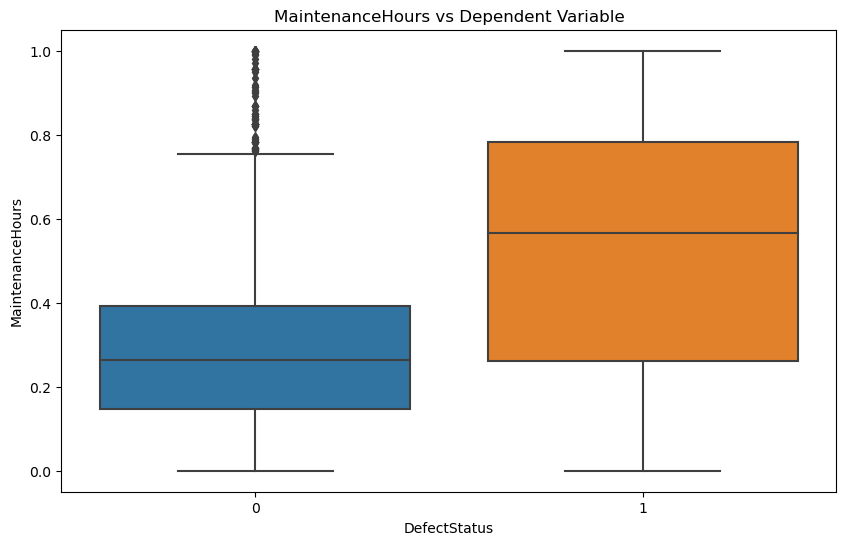

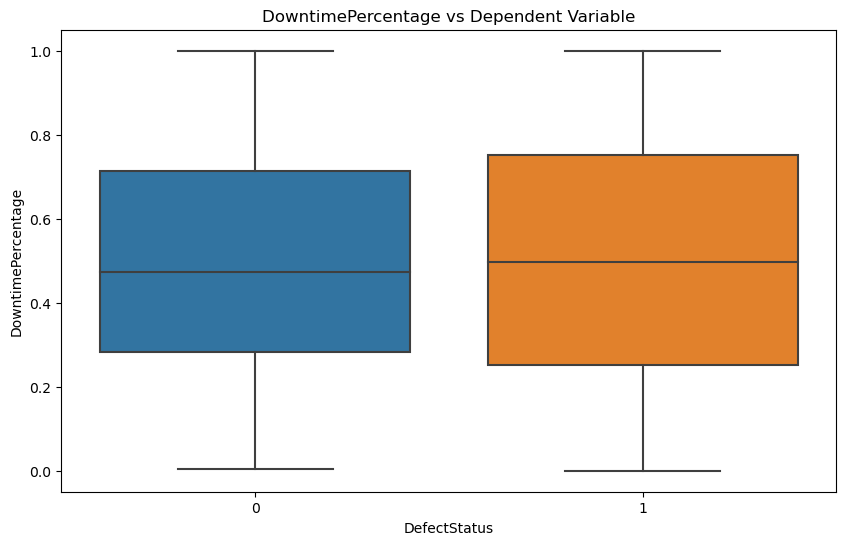

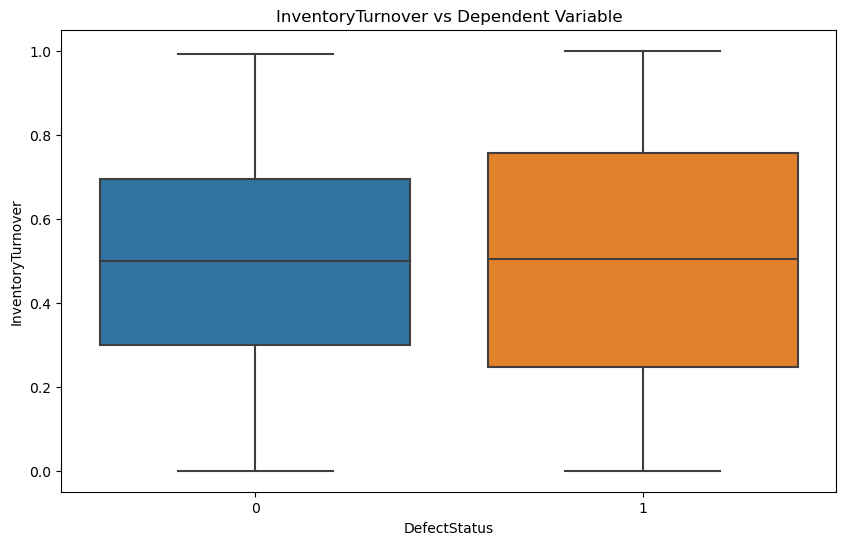

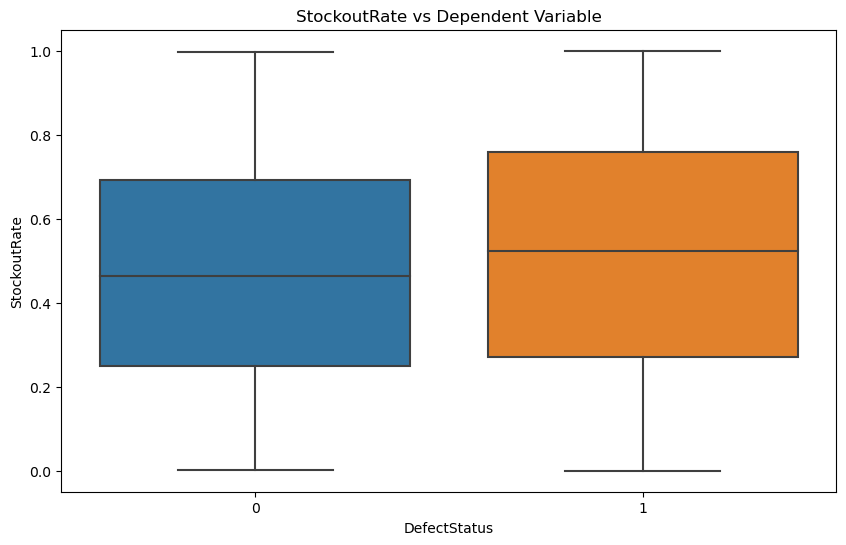

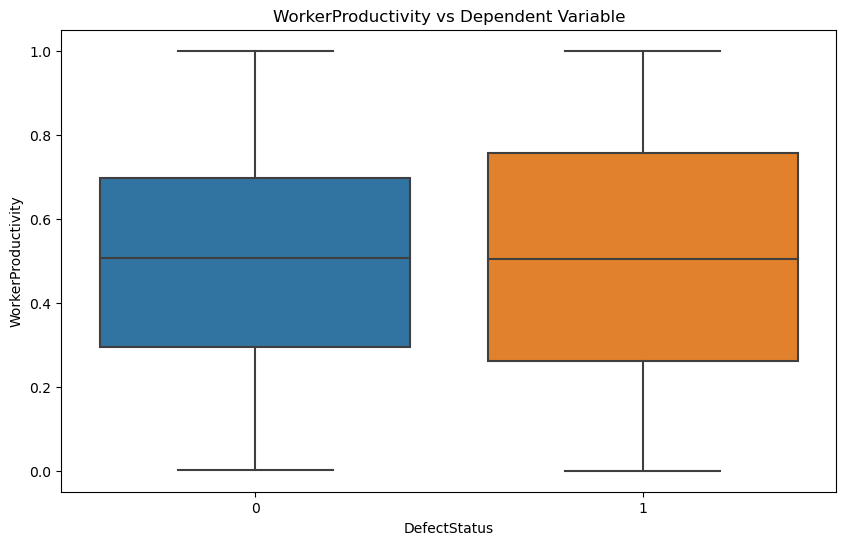

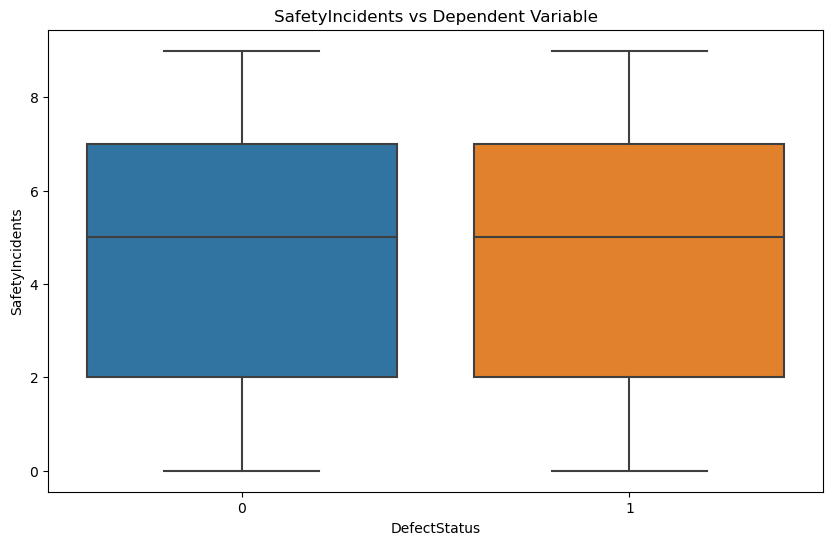

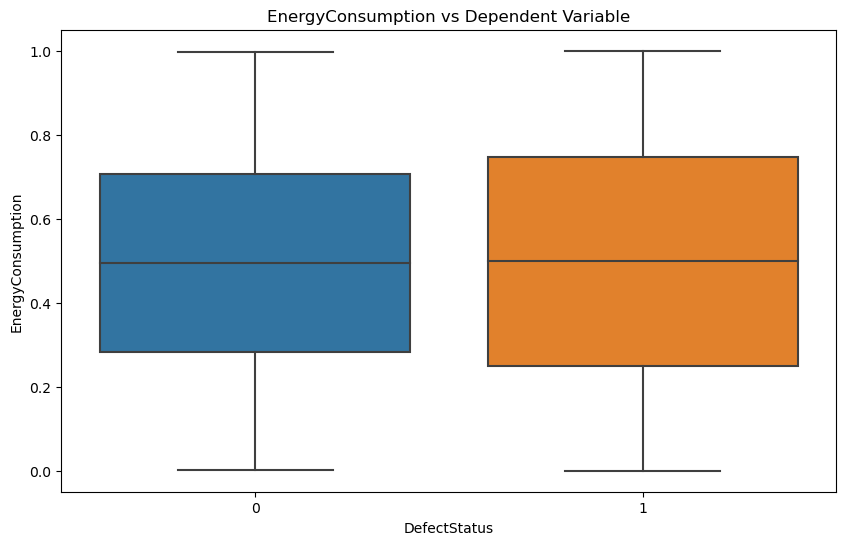

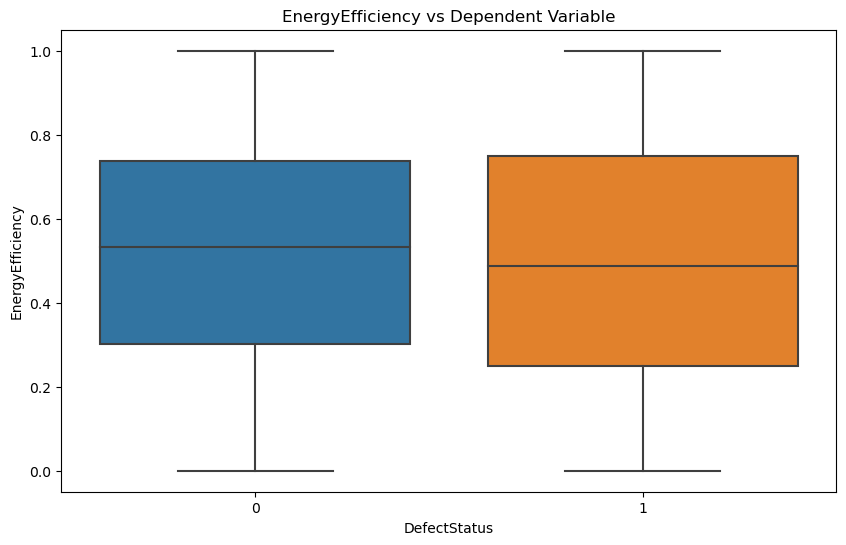

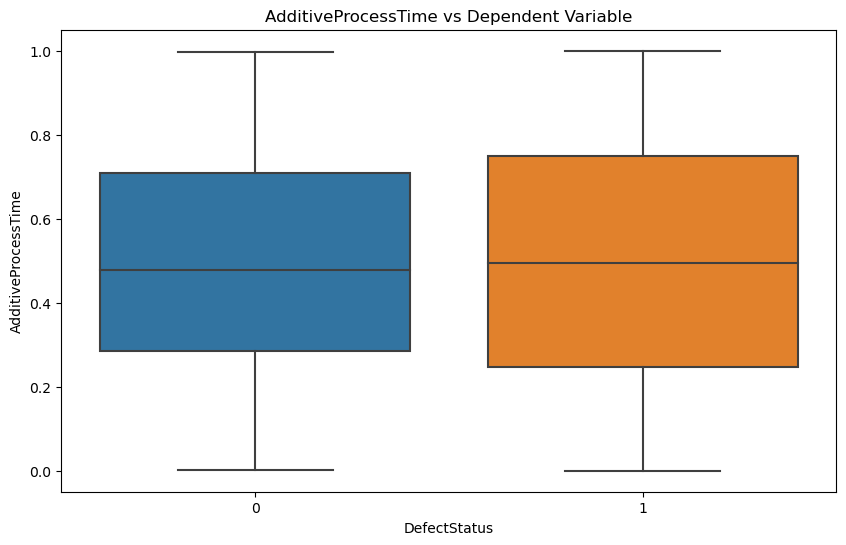

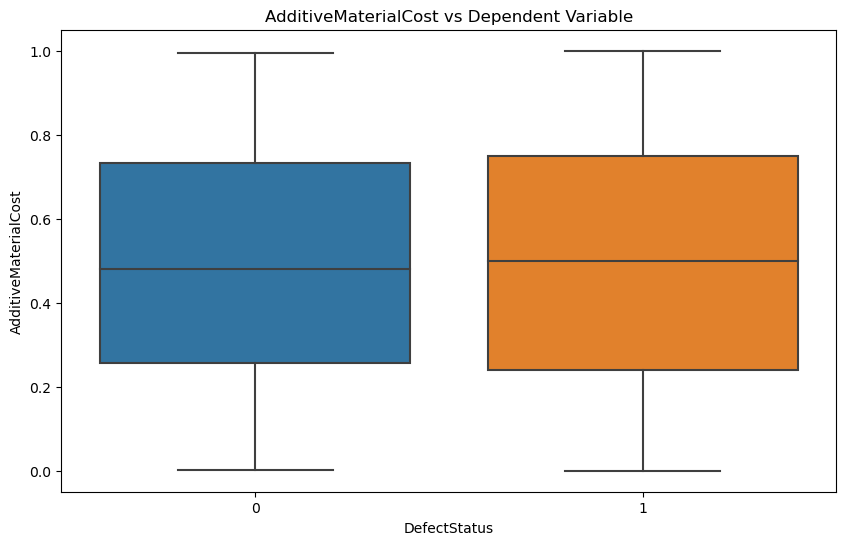

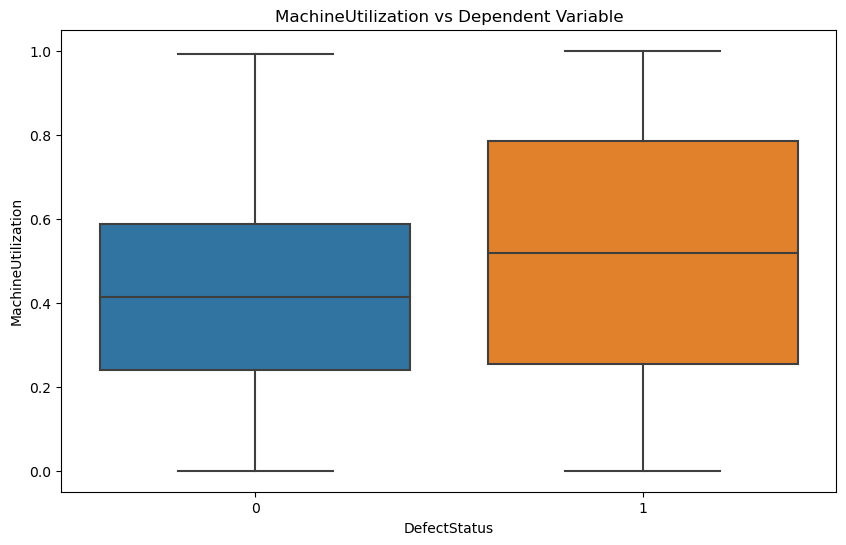

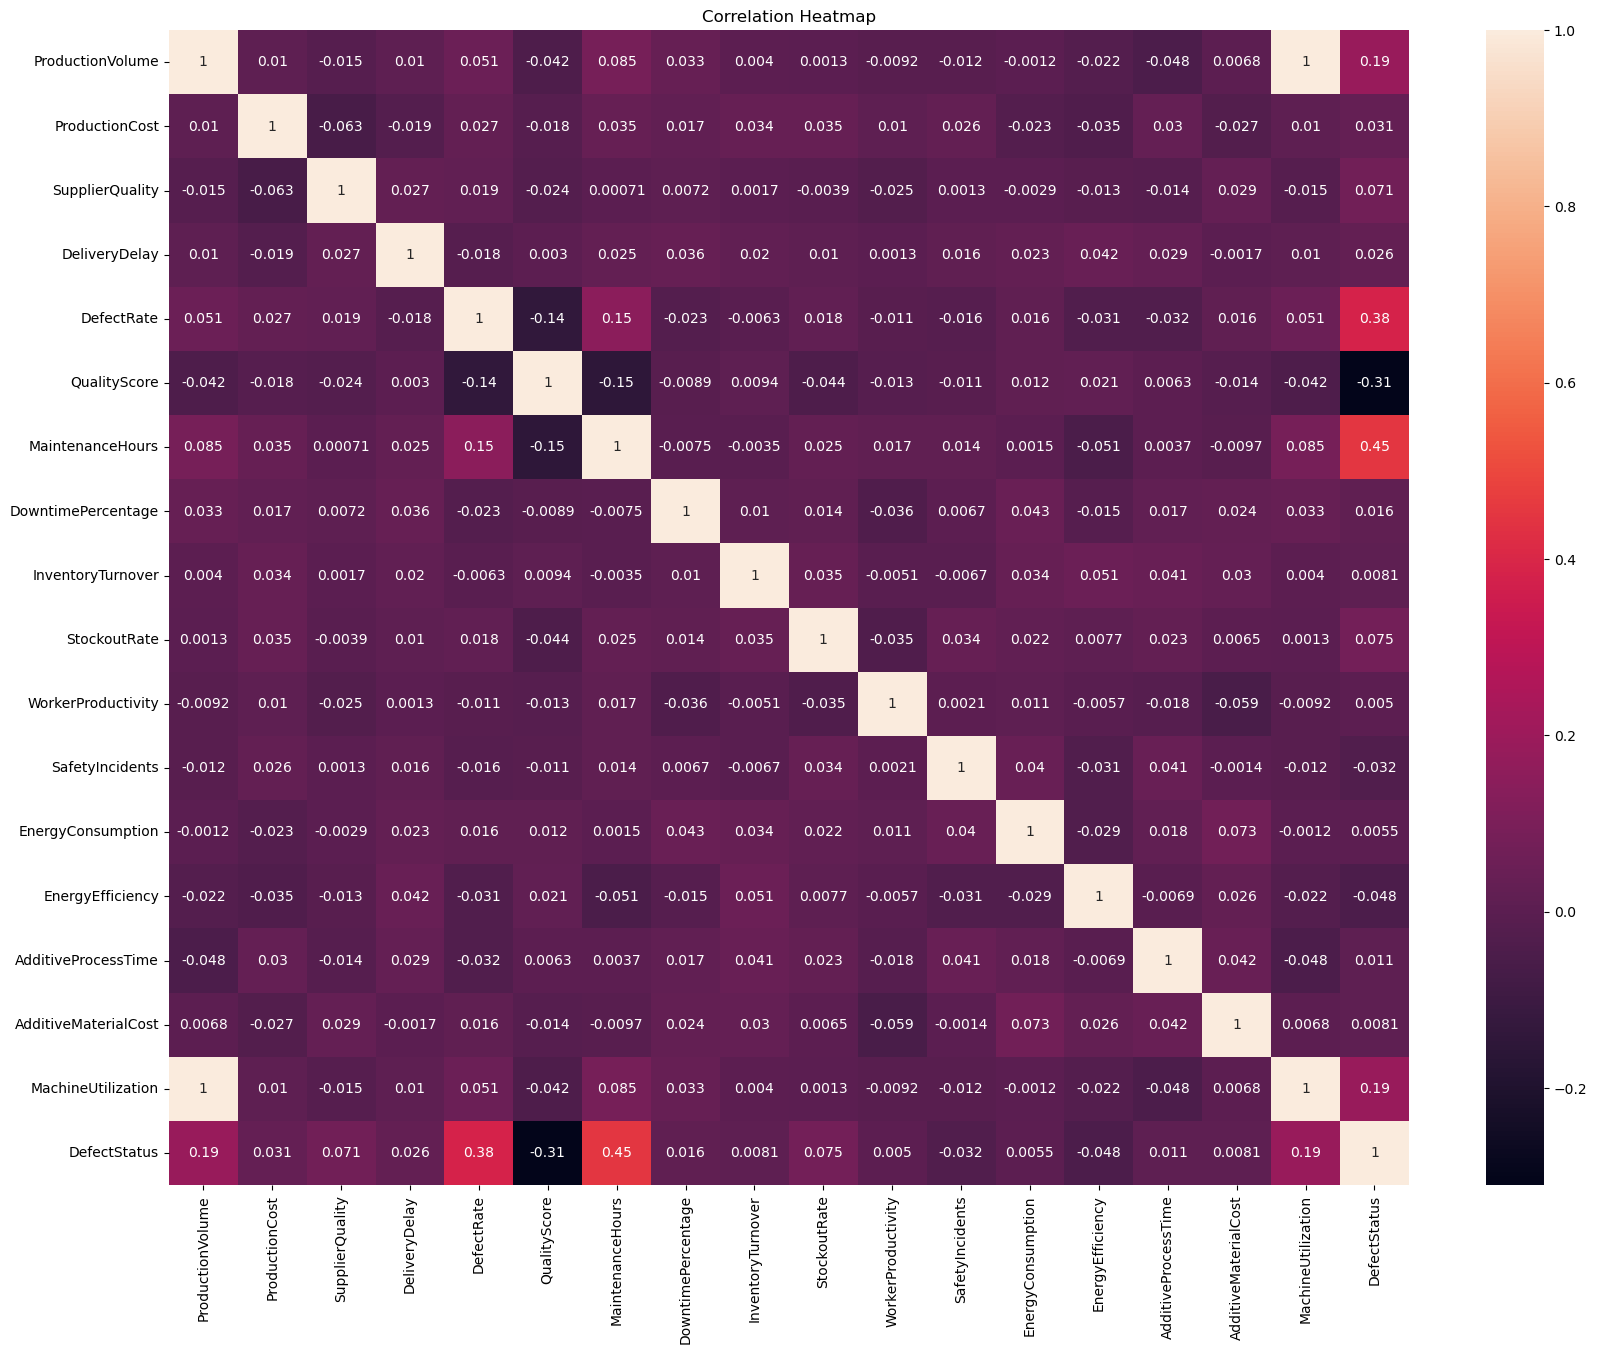

In [88]:
# Univariate Analysis
for column in df.columns:
    if column != 'DefectStatus':
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], bins=30, kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

# Distribution of the dependent variable
sns.countplot(x='DefectStatus', data=df)
plt.title('Distribution of Dependent Variable')
plt.show()

# Bivariate Analysis
for column in df.columns:
    if column != 'DefectStatus':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='DefectStatus', y=df[column], data=df)
        plt.title(f'{column} vs Dependent Variable')
        plt.show()

# Multivariate Analysis
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In the above heatmap the correlation between Defect status x Defect rate and Defect status x Maintainence hours are positively correlated.

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       801
           1       0.90      0.98      0.94       833

    accuracy                           0.94      1634
   macro avg       0.94      0.94      0.94      1634
weighted avg       0.94      0.94      0.94      1634

Confusion Matrix:
[[712  89]
 [ 13 820]]


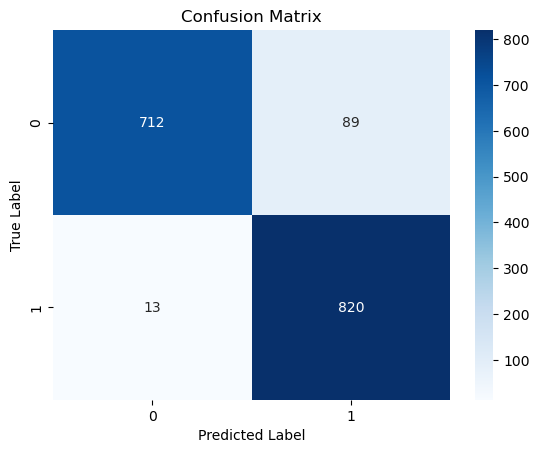

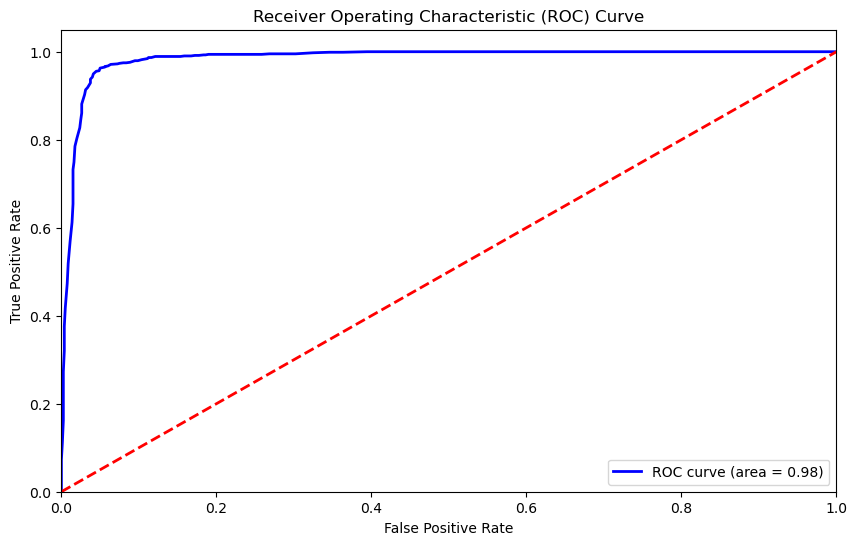

ROC AUC Score:  0.984553371910562


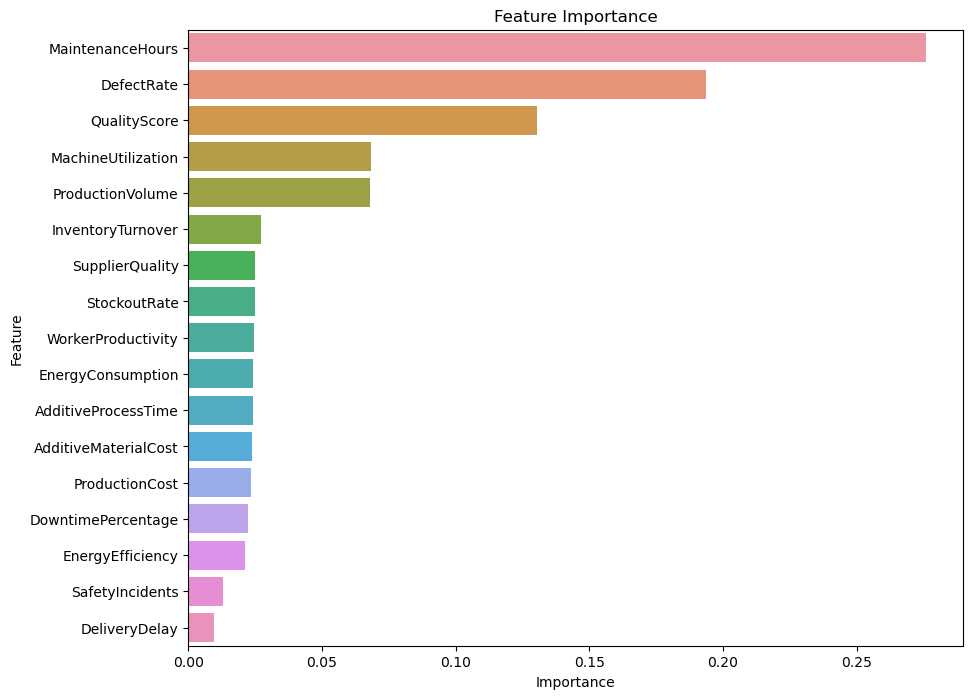

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Split the data into training and testing sets
X = df.drop('DefectStatus', axis=1)
y = df['DefectStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("ROC AUC Score: ", roc_auc)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


In this feature importance we can see that 5 variables play a vital role in dependent variable for Random forest algorithm.

In [90]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Split the data into training and testing sets
X = df.drop('DefectStatus', axis=1)
y = df['DefectStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the classifiers and get the results
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)  

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:19<00:00,  1.69it/s]

[LightGBM] [Info] Number of positive: 1890, number of negative: 1922
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3843
[LightGBM] [Info] Number of data points in the train set: 3812, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495803 -> initscore=-0.016789
[LightGBM] [Info] Start training from score -0.016789


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:19<00:00,  1.47it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.96               0.96     0.96      0.96   
XGBClassifier                      0.95               0.95     0.95      0.95   
ExtraTreesClassifier               0.95               0.95     0.95      0.95   
RandomForestClassifier             0.94               0.94     0.94      0.94   
BaggingClassifier                  0.93               0.93     0.93      0.93   
SVC                                0.91               0.90     0.90      0.91   
DecisionTreeClassifier             0.88               0.88     0.88      0.88   
NuSVC                              0.87               0.87     0.87      0.87   
LabelSpreading                     0.86               0.86     0.86      0.86   
LabelPropagation                   0.86               0.86     0.86      0.86   
GaussianNB                  

In [91]:
#key metrics calculation

#Production Efficiency
df['Production_Efficiency'] = df['ProductionVolume'] / df['ProductionCost']

#Supplier Performance
df['Supplier_Performance'] = df['SupplierQuality'] / df['DeliveryDelay']

#Maintenance Efficiency
df['Maintenance_Efficiency'] = 1 / df['MaintenanceHours']

#Safety Performance
df['Safety_Performance'] = 1 / df['SafetyIncidents'] 

#Additive Manufacturing Efficiency
df['Additive_Manufacturing_Efficiency'] = df['AdditiveProcessTime'] / df['AdditiveMaterialCost']

Key metrics to look after

Machine Utilization Rate: Machine Utilization
Manpower Utilization Rate: WorkerProductivity	

a) Defect Rate = DefectRate
b) Quality Score = QualityScore
c) Downtime Percentage = DowntimePercentage
d) Inventory Turnover = InventoryTurnover
e) Stockout Rate = StockoutRate
f) Energy Efficiency = EnergyEfficiency

In [92]:
df

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,...,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,MachineUtilization,DefectStatus,Production_Efficiency,Supplier_Performance,Maintenance_Efficiency,Safety_Performance,Additive_Manufacturing_Efficiency
0,0.11,0.55,0.87,1,0.58,0.09,0.39,0.01,0.83,0.81,...,0.92,0.51,0.34,0.11,1,0.21,0.87,2.56,inf,1.48
1,0.48,0.99,0.86,4,0.07,0.59,0.87,0.98,0.91,0.38,...,0.05,0.90,0.63,0.48,1,0.49,0.22,1.15,0.14,1.41
2,0.96,0.94,0.82,0,0.89,0.76,0.04,0.49,0.39,0.03,...,0.99,0.62,0.74,0.96,1,1.02,inf,23.00,0.50,0.83
3,0.30,0.04,0.87,5,0.03,0.19,0.35,0.94,0.20,0.55,...,0.21,0.79,0.16,0.30,1,6.96,0.17,2.87,0.12,4.93
4,0.12,0.16,0.82,3,0.75,0.57,0.39,0.55,0.61,0.68,...,0.41,0.60,0.66,0.12,1,0.72,0.27,2.56,0.14,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5441,0.64,0.44,0.90,4,0.39,0.62,0.41,0.28,0.73,0.06,...,0.20,0.72,0.42,0.64,0,1.44,0.22,2.43,0.11,1.72
5442,0.59,0.34,0.90,4,0.18,0.89,0.43,0.09,0.48,0.06,...,0.86,0.11,0.36,0.59,0,1.75,0.22,2.30,0.11,0.32
5443,0.22,0.18,0.90,3,0.65,0.27,0.82,0.11,0.56,0.04,...,0.14,0.69,0.05,0.22,0,1.20,0.30,1.21,0.25,13.18
5444,0.14,0.35,0.90,3,0.34,0.69,0.59,0.05,0.32,0.21,...,0.11,0.71,0.11,0.14,0,0.39,0.30,1.70,0.20,6.27
